# Modeling

**Problem Statement:**
What opportunities exist for the CRIC Study to investigate the effects of an individual’s choice of dialysis center on one’s kidney health in the upcoming research year?

CRIC is curious to know how an individual’s choice in dialysis center affects one’s kidney health. 

Attempting to predict a dialysis center's star rating given the center's features. 

This is a classification problem.

## Import Relevant Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import timeit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Load Data

In [2]:
dialysis = pd.read_csv('Data/capstone2_dialysis_scaled_data.csv', index_col=0)

## Explore Data

In [3]:
dialysis.head()

,Network,Five Star,Profit Or Non-Profit,Chain Owned,Late Shift,Number Of Dialysis Stations,Offers In-Center Hemodialysis,Offers Peritoneal Dialysis,Offers Home Hemodialysis Training,Percentage Of Medicare Patients With Hgb < 10 g/dL,...,Chain Organization_UPMC HEALTH SYSTEM,"Chain Organization_US RENAL CARE, INC.",Chain Organization_VETERANS ADMINISTRATION,Chain Organization_WAKE FOREST UNIVERSITY,Mortality Rate Standardized,Readmission Rate Standardized,Hospitalization Rate Standardized,Standard Infection Ratio Standardized,Transfusion Rate Standardized,Fistula Rate Standardized
0,13,2,0,1,0,18,1,1,1,21.0,...,0,0,0,0,2.140881,0.519890,0.866457,1.425778,0.736660,-0.969711
1,18,3,1,1,0,36,1,1,0,18.0,...,0,0,0,0,0.549616,0.506245,0.753945,0.003506,1.386172,0.502423
2,1,5,1,1,0,13,1,1,1,43.0,...,0,0,0,0,-1.234000,-0.953812,-0.592033,1.310012,0.717175,-0.353916
3,4,4,1,1,0,16,1,0,0,20.0,...,0,1,0,0,-1.024163,0.751862,-0.012804,1.161169,-0.250598,-0.555974
4,4,5,1,1,0,11,1,1,1,25.0,...,0,0,0,0,-3.035103,0.110528,-0.748299,-1.236849,-0.523393,-0.565595


In [4]:
dialysis.shape

(7554, 137)

In [5]:
dialysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7554 entries, 0 to 7625
Columns: 137 entries, Network to Fistula Rate Standardized
dtypes: float64(18), int64(119)
memory usage: 8.0 MB


## Test Train Split

In [6]:
# Let independent variables be features that at least moderately correlate with dependent variable (Five Star)
# Found from looking at correlation map in EDA notebook
X_columns =['Percent Of Adult HD Patients With Kt/V >= 1.2',
            'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
            'Mortality Rate Standardized',
            'Readmission Rate Standardized',
            'Hospitalization Rate Standardized',
            'Transfusion Rate Standardized',
            'Fistula Rate Standardized',
            'Percentage Of Adult Patients With Long Term Catheter In Use']
X = dialysis[X_columns]

# Set dependent variable to Five Star column 
y = dialysis['Five Star']

In [7]:
# Train test split data, keeping 25% of data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Print train and test shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5665, 8) (5665,)
(1889, 8) (1889,)


## Selecting an evaluation metric

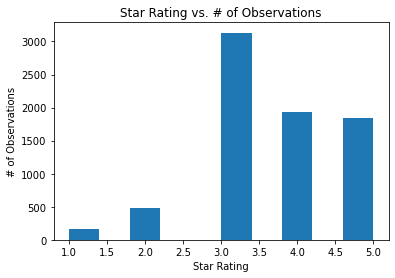

In [8]:
# Plot Five Star to see how dependent variable is distributed
_ = plt.hist(dialysis['Five Star'])
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('# of Observations')
_ = plt.title('Star Rating vs. # of Observations')

Need ordinal, multi-class classifiers.

Class imbalance in Five Star.

Common metrics for evaluating this type of model: F1 Score, Average Accuracy, and Log-Loss.

Log-loss does not differentiate between classes and only works well for symmetrical classes.

F1-score gives a better evaluation if most concerned about incorrectly identified labels.

Accuracy gives a better evaluation if most concerned about correctly identified labels. It is also commonly used when all classes are equally important.

***In this case, more concerned about correctly identified labels and all classes are equally important. Therefore, accuracy will be used as the evaluation metric.***

## Modeling

Four types of ordinal, multi-class classifiers:
- Gaussian Naive Bayesian Classifier
- K-Nearest Neighbor Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

### Model 1: Gaussian Naive Bayesian Classifier

In [9]:
# Start time to predict model runtime
start_gaus = timeit.default_timer()

# Fit and predict model
gaus = GaussianNB()
gaus.fit(X_train, y_train)
y_pred_gaus = gaus.predict(X_test)

# Stop time to predict model runtime
stop_gaus = timeit.default_timer()

# Define model runtime variable
Time_gaus = stop_gaus - start_gaus

In [10]:
# Cross-validate model performance
cv_test_gaus = cross_val_score(gaus, X_test, y_test, cv=5, scoring='accuracy')
cv_train_gaus = cross_val_score(gaus, X_train, y_train, cv=5, scoring='accuracy')
print(cv_test_gaus)

#Find average of CV scores for test & train
cv_train_gaus_avg = cv_train_gaus.mean()
cv_train_gaus_std = cv_train_gaus.std()
cv_test_gaus_avg = cv_test_gaus.mean()
cv_test_gaus_std = cv_test_gaus.std()
print('')
print ('Mean cross validation train score: ', cv_train_gaus_avg)
print ('Standard deviation in train cv scores: ', cv_train_gaus_std)
print('')
print ('Mean cross validation test score: ', cv_test_gaus_avg)
print ('Standard deviation in test cv scores: ', cv_test_gaus_std)
print('')
print('Runtime: ', Time_gaus)

[0.55789474 0.55555556 0.62864721 0.59151194 0.5596817 ]

Mean cross validation train score:  0.5862156989416688
Standard deviation in train cv scores:  0.013213554910820248

Mean cross validation test score:  0.5786582282408054
Standard deviation in test cv scores:  0.028245641679580262

Runtime:  0.006564988999969046


### Model 2: K-Nearest Neighbors Classifier

In [11]:
# Use GridSearch to find best n_neighbors parameter for K-Nearest Neighbor Model
param_grid_knn = {'n_neighbors': [1, 5, 10, 15, 25, 50, 100, 200, 500]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5) # Split training data into 5 cross validations
knn_cv.fit(X_train, y_train) 
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 25}
0.6820829655781112


In [12]:
# Define the best n_neighbors from the outcome of the above GridSearch
best_n_neighbors_knn = knn_cv.best_params_['n_neighbors']

# Start time to predict model runtime
start_knn = timeit.default_timer()

# Fit and predict model using best parameter
knn_best = KNeighborsClassifier(n_neighbors = best_n_neighbors_knn)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Stop time to predict model runtime
stop_knn = timeit.default_timer()

# Define model runtime variable
Time_knn = stop_knn - start_knn

In [13]:
# Cross-validate model performance
cv_test_knn = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
cv_train_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(cv_test_knn)

#Find average of CV scores for test & train
cv_train_knn_avg = cv_train_knn.mean()
cv_train_knn_std = cv_train_knn.std()
cv_test_knn_avg = cv_test_knn.mean()
cv_test_knn_std = cv_test_knn.std()
print('')
print ('Mean cross validation train score: ', cv_train_knn_avg)
print ('Standard deviation in train cv scores: ', cv_train_knn_std)
print('')
print ('Mean cross validation test score: ', cv_test_knn_avg)
print ('Standard deviation in test cv scores: ', cv_test_knn_std)
print('')
print('Runtime: ', Time_knn)

[0.60789474 0.64021164 0.65251989 0.63129973 0.62068966]

Mean cross validation train score:  0.6526060109106951
Standard deviation in train cv scores:  0.010550295756796398

Mean cross validation test score:  0.6305231321746748
Standard deviation in test cv scores:  0.015408240465322647

Runtime:  0.12371009500003538


### Model 3: Random Forest Classifier

In [14]:
# Use RandomizedSearchCV to find best parameters for Random Forest Model
param_grid_rf = {'n_estimators': [100, 250, 500, 750, 1000],
                 'criterion' : ['gini', 'entropy'],
                 'min_samples_split':[50, 100, 250],
                 'max_features':[None, 'sqrt']
                }
rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf, param_grid_rf, cv=5) # Split training data into 5 cross validations
rf_cv.fit(X_train, y_train) 
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'n_estimators': 1000, 'min_samples_split': 20, 'max_features': None, 'criterion': 'entropy'}
0.7041482789055604


In [15]:
# Define the best n_estimators from the outcome of the above RandomizedSearch
best_n_estimators_rf = rf_cv.best_params_['n_estimators']
best_criterion_rf = rf_cv.best_params_['criterion']
best_min_samples_split_rf = rf_cv.best_params_['min_samples_split']
best_max_features_rf = rf_cv.best_params_['max_features']


# Start time to predict model runtime
start_rf = timeit.default_timer()

# Fit and predict model using best parameter
rf_best = RandomForestClassifier(n_estimators=best_n_estimators_rf, criterion=best_criterion_rf,
                                 min_samples_split=best_min_samples_split_rf, max_features=best_max_features_rf)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

# Stop time to predict model runtime
stop_rf = timeit.default_timer()

# Define model runtime variable
Time_rf = stop_rf - start_rf

In [16]:
# Cross-validate model performance
cv_test_rf = cross_val_score(rf_best, X_test, y_test, cv=5, scoring='accuracy')
cv_train_rf = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')
print(cv_test_rf)

#Find average of CV scores for test & train
cv_train_rf_avg = cv_train_rf.mean()
cv_train_rf_std = cv_train_rf.std()
cv_test_rf_avg = cv_test_rf.mean()
cv_test_rf_std = cv_test_rf.std()
print('')
print ('Mean cross validation train score: ', cv_train_rf_avg)
print ('Standard deviation in train cv scores: ', cv_train_rf_std)
print('')
print ('Mean cross validation test score: ', cv_test_rf_avg)
print ('Standard deviation in test cv scores: ', cv_test_rf_std)
print('')
print('Runtime: ', Time_rf)

[0.67631579 0.7010582  0.69496021 0.69496021 0.67374005]

Mean cross validation train score:  0.7032646434371436
Standard deviation in train cv scores:  0.006266098919977368

Mean cross validation test score:  0.6882068935970932
Standard deviation in test cv scores:  0.01101869829412636

Runtime:  25.96549698299998


### Model 4: Gradient Boosting Classifier

In [19]:
# Use RandomizedSearchCV to find best parameters for Gradient Boost Model
param_grid_gb = {'learning_rate':[0.30, 0.15,0.1,0.05,0.01], 
                 'n_estimators':[100,250,500,750,1000],
                 'min_samples_split':[50, 100, 250],
                 'max_features':[None, 'sqrt']
                }
gb = GradientBoostingClassifier()
gb_cv = RandomizedSearchCV(gb, param_grid_gb, cv=5) # Split training data into 5 cross validations
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
print(gb_cv.best_score_)

{'n_estimators': 500, 'min_samples_split': 250, 'max_features': 'sqrt', 'learning_rate': 0.05}
0.7306266548984995


In [22]:
# Define the best parameters from the outcome of the above RandomizedSearch
best_learning_rate_gb = gb_cv.best_params_['learning_rate']
best_n_estimators_gb = gb_cv.best_params_['n_estimators']
best_min_samples_split_gb = gb_cv.best_params_['min_samples_split']
best_max_features_gb = gb_cv.best_params_['max_features']

# Start time to predict model runtime
start_gb = timeit.default_timer()

# Fit and predict model using best parameter
gb_best = GradientBoostingClassifier(learning_rate=best_learning_rate_gb, n_estimators=best_n_estimators_gb, 
                                     min_samples_split=best_min_samples_split_gb, max_features=best_max_features_gb)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)

# Stop time to predict model runtime
stop_gb = timeit.default_timer()

# Define model runtime variable
Time_gb = stop_gb - start_gb

In [23]:
# Cross-validate model performance
cv_test_gb = cross_val_score(gb_best, X_test, y_test, cv=5, scoring='accuracy')
cv_train_gb = cross_val_score(gb_best, X_train, y_train, cv=5, scoring='accuracy')
print(cv_test_gb)

#Find average of CV scores for test & train
cv_train_gb_avg = cv_train_gb.mean()
cv_train_gb_std = cv_train_gb.std()
cv_test_gb_avg = cv_test_gb.mean()
cv_test_gb_std = cv_test_gb.std()
print('')
print ('Mean cross validation train score: ', cv_train_gb_avg)
print ('Standard deviation in train cv scores: ', cv_train_gb_std)
print('')
print ('Mean cross validation test score: ', cv_test_gb_avg)
print ('Standard deviation in test cv scores: ', cv_test_gb_std)
print('')
print('Runtime: ', Time_gb)

[0.72105263 0.71957672 0.71883289 0.71087533 0.69761273]

Mean cross validation train score:  0.7291976433590863
Standard deviation in train cv scores:  0.016584239435425037

Mean cross validation test score:  0.7135900612125657
Standard deviation in test cv scores:  0.00873684272931275

Runtime:  6.1954530349999


## Best Model

In [27]:
model_name = ['Gaussian Naive Bayesian', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting']
cv_test_model = [cv_test_gaus_avg, cv_test_knn_avg, cv_test_rf_avg, cv_test_gb_avg]
cv_train_model = [cv_train_gaus_avg, cv_train_knn_avg, cv_train_rf_avg, cv_train_gb_avg]
model_time = [Time_gaus, Time_knn, Time_rf, Time_gb]

modelscompared = pd.DataFrame(list(zip(model_name, cv_train_model, cv_test_model, model_time)), 
                              columns =['Model Type', 'Accuracy Train Score', 'Accuracy Test Score', 'Runtime' ]) 
modelscompared

,Model Type,Accuracy Train Score,Accuracy Test Score,Runtime
0,Gaussian Naive Bayesian,0.586216,0.578658,0.006565
1,K-Nearest Neighbors,0.652606,0.630523,0.123710
2,Random Forest,0.703265,0.688207,25.965497
3,Gradient Boosting,0.729198,0.713590,6.195453


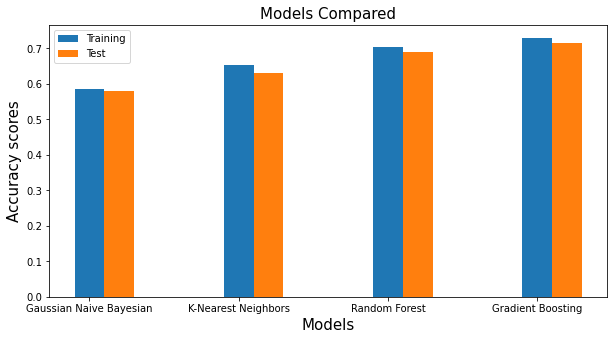

In [25]:
# Visually compare training and test models

index = [1, 2, 3, 4]
index_acc = [1.2, 2.2, 3.2, 4.2]
modelscompared_plot = plt.figure(figsize=(10, 5))
modelscompared_plot = plt.xlabel('Models', fontsize=15)
modelscompared_plot = plt.ylabel ('Accuracy scores', fontsize=15)
modelscompared_plot = plt.title('Models Compared', fontsize=15)
modelscompared_plot = plt.bar(index,cv_train_model, label='Training',width=0.2)
modelscompared_plot = plt.bar(index_acc,cv_test_model, label='Test',width=0.2)
modelscompared_plot = plt.xticks([1, 2, 3, 4], model_name)
modelscompared_plot = plt.legend()
plt.show()

In [30]:
# Rank feature importance
features = X
importances = list(gb_best.feature_importances_)
importances_sorted = np.sort(importances)
importance_table = pd.DataFrame(list(zip(X, importances)),columns =['Features', 'Importance scores']) 
importance_table

,Features,Importance scores
0,Percent Of Adult HD Patients With Kt/V >= 1.2,0.121128
1,Percentage Of Adult Patients With Hypercalcemi...,0.082197
2,Mortality Rate Standardized,0.090021
3,Readmission Rate Standardized,0.092898
4,Hospitalization Rate Standardized,0.164997
5,Transfusion Rate Standardized,0.078268
6,Fistula Rate Standardized,0.192937
7,Percentage Of Adult Patients With Long Term Ca...,0.177555


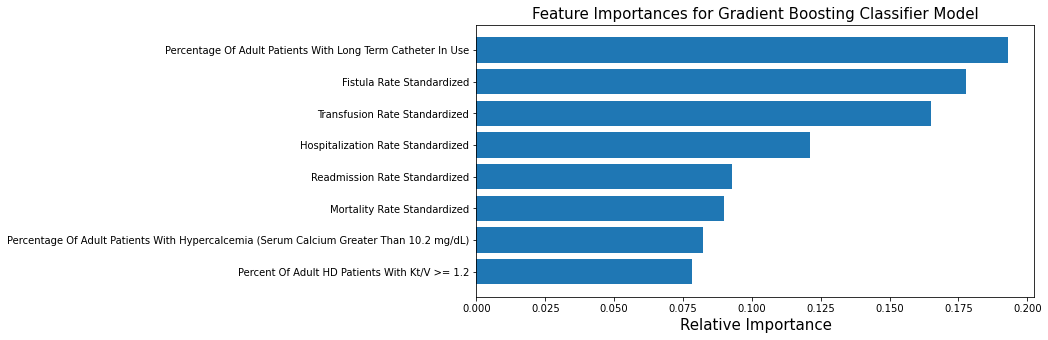

In [32]:
# Bar graph of feature importance
index = [0, 1, 2, 3, 4, 5, 6, 7]
importance_plot = plt.figure(figsize=(10, 5))
importance_plot = plt.barh(index, importances_sorted)
importance_plot = plt.xlabel('Relative Importance',fontsize=15)
importance_plot = plt.yticks(index, features)
importance_plot = plt.title('Feature Importances for Gradient Boosting Classifier Model',fontsize=15)
plt.show()

## Results

Gradient Boosting has the highest accuracy scores but Random Forest is a close second. Gradient Boosting, also, runs in a quarter of the time as Random Forest. Therefore, the best model appears to be Gradient Boosting.